In [1]:
# 2023.5.1
# reconstructed code 

# no random init
# 1D sine function

In [ ]:
import os

cuda_device = '3'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train



In [ ]:
import torch.multiprocessing as mp
num_processes = 10


width_vector = [10, 20, 40, 80, 160, 320]

result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 0
    
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        
        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()
            result_matrix[i, idx, :] = [error, error_infty]

    i += 1

    

(6, 10, 2)
0.8855099556154594
<class 'numpy.ndarray'>
0.0
[0.17788688 0.05687042 0.01620989 0.00940157 0.00369528 0.0013398 ]
[0.88550996 0.56379145 0.26775845 0.23476387 0.13951381 0.09239387]
y_min: [0.03896744 0.01442722 0.00537862 0.00133395 0.00107521 0.00018577]
y_max: [0.62947839 0.13413785 0.04385671 0.03028002 0.01675539 0.00612181]
[[0.13891944 0.0424432  0.01083127 0.00806762 0.00262007 0.00115403]
 [0.45159151 0.07726744 0.02764683 0.02087845 0.01306011 0.00478201]]


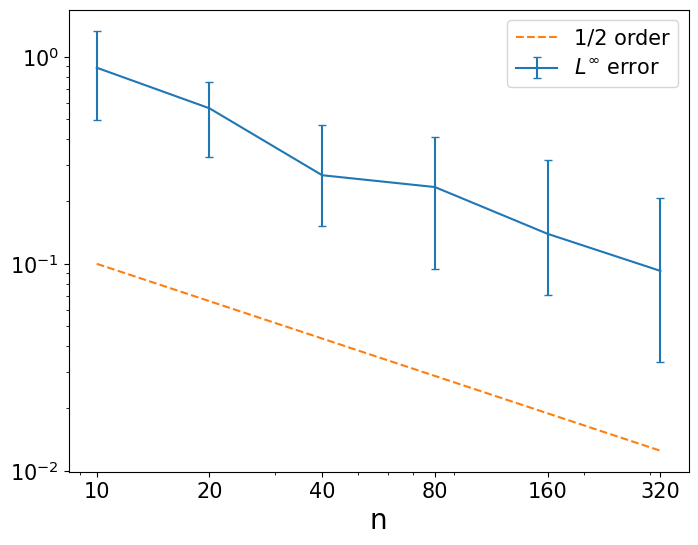

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])


print(mean)
print(mean_inf)


y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]

ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()